<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_01_pandas_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```


13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



# **Solucion (guia paso a paso para realizar un tratamiento de los datos del dataset y un análisis exploratorio-descriptivo de diferentes aspectos del mismo):**



1. Leer los datos desde una página web

Bueno, yendo a la direccion https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic, uno se encuentra con varias explicaciones de varias cosas entre ellas, como se constituye la tabla, que en resumidas cuentas esta como:
* Columna-Campo 1: ID (número identificador).

* Columna-Campo 2: Diagnosis (M = maligno, B = benigno).

* Columnas-Campo 3-32: 30 features numéricas, cada una con 3 variantes (mean, se, "worst" or largest (mean of the three largest values))..... es decir, es decir..... haber, partamos por mencionar que estos datos se sacan-calculan apartir de una imagen digitalizada de un aspirado con aguja fina (FNA) de unas masa mamaria, de modo que describen las caracteristicas de los nucleos celulares presentes en la imagen (de modo que son sobre caracteristicas nucleares y pueden servir para el diagnostico de tumores de mama) via metodos de clasificacion..... el caso, es que en dicho proceso terminaron generando una tabla con 32 atributos y 569 instancias (registros) donde de esos 32 atributos, los primeros dos ya los mencionamos y los otros 30 devienen de que "en realidad" tenemos 10 caracteristicas base que se calculan para cada nucleo celular y son:
  - radius (mean of distances from center to points on the perimeter)
  - texture (standard deviation of gray-scale values)
  - perimeter
  - area
  - smoothness (local variation in radius lengths)
  - compactness (perimeter^2 / area - 1.0)
  - concavity (severity of concave portions of the contour)
  - concave points (number of concave portions of the contour)
  - symmetry
  - fractal dimension ("coastline approximation" - 1)
  
  y que por cada una de estas se tiene-calculo:
  * la media
  * el error estándar
  * el "peor" o mayor valor (worst = promedio-media de los tres valores más grandes)

  De modo que estas características se calcularon para cada imagen, resultando en 10*3 = 30 atributos-campos. De modo que por ejemplo: Campo 3 es Radio Medio, Campo 13=3+10 es Radio SE y Campo 23=3+(2)10 es Radio Peor

....

Por ultimo mencionar que tenemos 357 benignos y 212 malignos y que todos los valores de las características se codifican con cuatro cifras significativas.

<br>

Ahora bien, otra cosa que se menciona alli es que hay dos dataset files
- wdbc.data	(121.2 KB)
- wdbc.names (4.6 KB)

y que la base de datos esta tambien disponible a traves de UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/...... es decir, lo que en el fondo buscamos pues queremos leer los datos desde una pagina web. De modo que dirigiendonos, lo que uno encuentra alla (guardado) son los dos dataset files que menciona la pagina en que estabamos. Al inpeccionarlos uno encuentra que el .names es mas info sobre lo que ya nos habian contado (mas completo y organizado a mi parecer, sobre el origen de los datos y los usos que se les ha dado). Y el .data si es datos regados sin cabecera (que es pues la tabla que estabamos buscando), Por ello considere:



In [91]:
#-links de los archivos dataset-
"https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.dat"
"https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.doc"

#-puse a gpt a que encontrara url's y maliciosamente saco-desenterro estos links que estan "deprecados" porque demas que son de un servidor viejo pero pues aun
#  funcionan y tiene pues la esturctura https://archive.ics.uci.edu/ml/machine-learning-databases/<nombre_de_la_carpeta>/<nombre_archivo> (i,e todos los archivos del
#  repositorio están en una carpeta fija en el contexto de este servidor viejo i,e ese servidor funciona como un directorio, y cada dataset está en una carpeta)-
"https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
"https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names"

'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names'

In [92]:
!wget https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.doc

print("-----------------------------------------------------------------------------------------------------")
print("Para leer solo las primeras lineas del .doc:")
!head WDBC.doc

#print("-----------------------------------------------------------------------------------------------------")
#print("Para leer el documento completo:")
#with open("WDBC.doc", "r") as f:
#    print(f.read())

--2025-10-03 01:34:32--  https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.doc
Resolving ftp.cs.wisc.edu (ftp.cs.wisc.edu)... 128.105.2.21
Connecting to ftp.cs.wisc.edu (ftp.cs.wisc.edu)|128.105.2.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4708 (4.6K) [application/msword]
Saving to: ‘WDBC.doc.1’

WDBC.doc.1          100%[===================>]   4.60K  --.-KB/s    in 0s      

2025-10-03 01:34:32 (1.50 GB/s) - ‘WDBC.doc.1’ saved [4708/4708]

-----------------------------------------------------------------------------------------------------
Para leer solo las primeras lineas del .doc:
1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu



In [93]:
#-importamos pandas, basiquisimo para lo que vamos hacer de trabajar con datos, tablas etc-
import pandas as pd

#-el dataset Breast Cancer Wisconsin (Diagnostic) tiene los datos en este archivo-URL:-
url = "https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.dat"

df_data = pd.read_csv(url, header=None)
df_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


vemos que hay 569x32, entonces pinta bien en cuanto es coherente con lo que dice la pagina y el .doc ............. prosigamos por bien nombrar los campos-columnas segun lo indicado en las fuentes:

In [94]:
columnas = [
    "ID", "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",                           #-promedio, en la pagina les ponen 1 en vez de _mean-
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",                                     #-errores estandar, en la pag ponen 2 en vez de _se-
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",                      #-el "peor"-worst-mayor valor que es el promedio de los
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"#  tres valores más grandes (en la pagina ponen 3 en vez
]                                                                                                              #  de _worst-

df = pd.read_csv(url, header=None, names=columnas)
df

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


2. Renombrar las columnas en formato PascalCase.

In [95]:
print("hola_que".split("_"))
print("hOlA".capitalize())
print('~'.join("hola_que".split("_")))

['hola', 'que']
Hola
hola~que


In [96]:
#-hacemos la funcion lambda-
PasC = lambda texto: ''.join(word.capitalize() for word in texto.split('_'))

#-y pues ya la ponemos en el mapper-
df_PascalCase = df.rename(mapper = {col: PasC(col) for col in df.columns}, axis="columns").copy()
df_PascalCase

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

In [97]:
df_PascalCase.head()  #-5 primeros registros-

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [98]:
df_PascalCase.tail()  #-5 ultimos registros-

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [99]:
df_PascalCase.describe()  #-hace un resumen estadistico-descriptivo de los datos en la tabla.... note que se salto Diagnosis porque no es numerico-

,Id,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [100]:
df_PascalCase.info()  #-este muestra como info en general de la tabla... mas sobre la tabla como un todo que sobre los datos... verificamos lo que señalaban las fuentes
                      #  de que no hay nulos-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     569 non-null    int64  
 1   Diagnosis              569 non-null    object 
 2   RadiusMean             569 non-null    float64
 3   TextureMean            569 non-null    float64
 4   PerimeterMean          569 non-null    float64
 5   AreaMean               569 non-null    float64
 6   SmoothnessMean         569 non-null    float64
 7   CompactnessMean        569 non-null    float64
 8   ConcavityMean          569 non-null    float64
 9   ConcavePointsMean      569 non-null    float64
 10  SymmetryMean           569 non-null    float64
 11  FractalDimensionMean   569 non-null    float64
 12  RadiusSe               569 non-null    float64
 13  TextureSe              569 non-null    float64
 14  PerimeterSe            569 non-null    float64
 15  AreaSe

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

   <br>

   Bueno, anteriormente vimos que no habian con el .info() xD, pero demas que lo que quieren que haga es lo siguiente:
  


In [101]:
mask = df_PascalCase.isnull()  #-devuelve una matriz booleana (True si es NaN)-
mask.sum()  #-suma sobre los registros del DataFrame los True's y da (por ello) un conteo por columna-

,0
Id,0
Diagnosis,0
RadiusMean,0
TextureMean,0
PerimeterMean,0
AreaMean,0
SmoothnessMean,0
CompactnessMean,0
ConcavityMean,0
ConcavePointsMean,0


In [102]:
mask.sum().sum()

np.int64(0)

Y pues asi pues, en efecto, vemos que no hay ningun null o NaN, como ya habiamos visto y por ello mencionado..... y por ello no hay que proponer ninguna estrategia de reemplazo..... aunque si hubiesen, podriamos pensar en usar un promedio o una moda o ver cual valor usualmente iria ahi en relacion a los otros campos

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

In [103]:
df_PascalCase.Diagnosis.unique()   #-de la documentacion por asi decirlo xD, se sabe que la aqui susodicha target es Diagnosis.... y nada he aqui sus posible valores-

array(['M', 'B'], dtype=object)

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

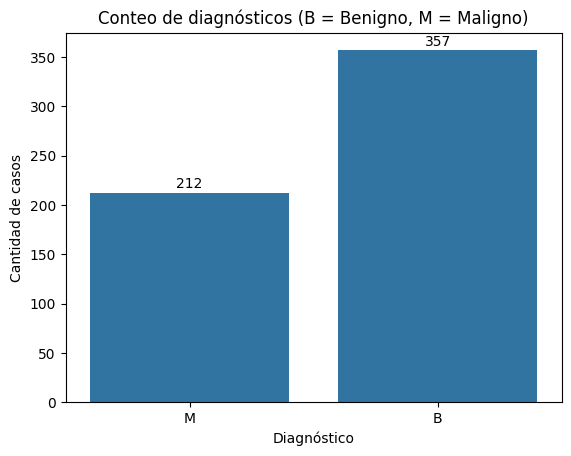

In [104]:
#-bueno, pues un conteo de los casos etiquetados B y M usando la libreria seaborn, el metodo countplot(), equivale a decir de manera simplificada, haga un gráfico de
#  barras con countplot(). Por ello:-
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="Diagnosis", data=df_PascalCase)

#-Añadir los números encima de cada barra-
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,   #-posición X centrada-
            p.get_height() + 5,            #-un poquito encima de la barra-
            int(p.get_height()),           #-el valor entero del conteo..... tambien lo podemos sacar con df_PascalCase.groupby("Diagnosis").size()["M o B"]-
            ha='center')                   #-alineación centrada-

plt.title("Conteo de diagnósticos (B = Benigno, M = Maligno)")
plt.xlabel("Diagnóstico")
plt.ylabel("Cantidad de casos")
plt.show()


lo cual nos dio excelente porque tambien coincide con lo que decia la "documentacion"

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).

In [105]:
df_PascalCase_plus = df_PascalCase.copy()
df_PascalCase_plus["DiagnosisNumeric"] = df_PascalCase["Diagnosis"].map({"M": 1, "B":0})
df_PascalCase_plus

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [106]:
df_PascalCase_plus.groupby("DiagnosisNumeric").size()  #-con esto verifcamos que quedo melo-

,0
DiagnosisNumeric,
0,357
1,212


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

In [107]:
promedios = df_PascalCase_plus.select_dtypes(include='number').mean()
promedios

,0
Id,3.037183e+07
RadiusMean,1.412729e+01
TextureMean,1.928965e+01
PerimeterMean,9.196903e+01
AreaMean,6.548891e+02
SmoothnessMean,9.636028e-02
CompactnessMean,1.043410e-01
ConcavityMean,8.879932e-02
ConcavePointsMean,4.891915e-02
SymmetryMean,1.811619e-01


In [108]:
desviaciones = df_PascalCase_plus.select_dtypes(include='number').std()  #-acuerdese que esto saca la muestral con ddof=1 (delta degrees of freedom)-
desviaciones

,0
Id,1.250206e+08
RadiusMean,3.524049e+00
TextureMean,4.301036e+00
PerimeterMean,2.429898e+01
AreaMean,3.519141e+02
SmoothnessMean,1.406413e-02
CompactnessMean,5.281276e-02
ConcavityMean,7.971981e-02
ConcavePointsMean,3.880284e-02
SymmetryMean,2.741428e-02


In [109]:
df_PascalCase_plus_unid_std = (df_PascalCase_plus.select_dtypes(include='number')-promedios)/desviaciones  #- (df-df.mean()) / df.std()-
df_PascalCase_plus_unid_std

,Id,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
0,-0.236197,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,1.296535
1,-0.236196,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,1.296535
2,0.431362,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,1.296535
3,0.431741,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,1.296535
4,0.431821,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,1.296535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235524,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,1.296535
565,-0.235522,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,1.296535
566,-0.235520,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,1.296535
567,-0.235518,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,1.296535


In [110]:
#-no quiero botar aun el campo diagnostico, por ello:-
df_PascalCase_plus_unid_std["Diagnosis"] = df_PascalCase_plus["Diagnosis"].copy()
df_PascalCase_plus_unid_std

,Id,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric,Diagnosis
0,-0.236197,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,1.296535,M
1,-0.236196,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,1.296535,M
2,0.431362,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,1.296535,M
3,0.431741,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,1.296535,M
4,0.431821,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,1.296535,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235524,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,1.296535,M
565,-0.235522,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,1.296535,M
566,-0.235520,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,1.296535,M
567,-0.235518,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,1.296535,M


In [111]:
##-si quiere recuperar la DiagnosisNumeric en 1's y 0's, una opcion es correr:-
#df_PascalCase_plus_unid_std.DiagnosisNumeric = df_PascalCase_plus.DiagnosisNumeric.copy()

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.

Bueno, yo en mi corazoncito, siento que realizar este punto con la tabla en "unidades" standard no tiene mucho sentido, porque pues el promedio que va mostrar son cosas que casi que son cero......... dialogado esto, considere:

In [112]:
df_PascalCase_plus

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [113]:
df_PascalCase_plus_ord = df_PascalCase_plus.copy()

cols = df_PascalCase_plus_ord.columns.tolist()           #-obtener lista de columnas-
cols.insert(2, cols.pop(cols.index("DiagnosisNumeric"))) #-sacar "Diagnosis" y ponerla en índice 2-
df_PascalCase_plus_ord = df_PascalCase_plus_ord[cols]    #-reordenar DataFrame-
df_PascalCase_plus_ord

,Id,Diagnosis,DiagnosisNumeric,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


haber por como esta planteado el enunciado, la verdad, la verdad, siento que me estan pidiendo que busque las columnas que tienen el mismo nombre excepto el final, lo cual particularmente sucede, con las 30 que son producto de ser el promedio de las caracteristicas, sus errores estandar y luego sus "worst"...... es decir, por ejm mi expresion regular es Radios, entonces la agrupacion seria RadiusMean, RadiusSe y RadiusWorst..... y la idea seria promediarlos ????? :ooooo bueno, idk, digamos que este ejercicio es pedagogicos como pa aprender a usar esas cosas..... y que estoy leyendo bien (pues es que igual por lo de re y startswith() la verdad esto parece ser lo que ellos quieren.... sino que es que pues, mucho sentido pensario yo pues, quien sabe.....)

In [123]:
import re
"""
Sintaxis básica:

import re
resultado = re.match(patrón, cadena)

• patrón → la expresión regular que buscás
• cadena → el string donde buscás
• Retorna un objeto match si coincide al principio de la cadena, o None si no coincide.

Ejemplo soft:
import re

# Coincide al inicio
m = re.match(r"Hola", "Hola mundo")
if m:
    print("Coincide:", m.group())  # Coincide: Hola

# No coincide al inicio
m = re.match(r"mundo", "Hola mundo")
print(m)  # None

cabe notar que:
• .group() → devuelve-obtiene la parte de la cadena que coincide-coincidio con el patrón.... bueno, de manera mas especifica, es un método del objeto match que devuelve
  la parte de la cadena que coincidió con el patrón.
  - Si no hay coincidencia (re.match() devuelve None), intentar m.group() da error. Siempre conviene hacer un chequeo if m: antes.
• re.match() solo mira el inicio de la cadena.
• Si querés buscar en cualquier parte de la cadena, usás re.search() en vez de match().

Ejemplo un poquito mas pro,
.group() puede recibir índices si tu patrón tiene grupos entre paréntesis. Por ejemplo:
m = re.match(r"(Hola) (mundo)", "Hola mundo")
print(m.group(0))  # "Hola mundo" -> coincidencia completa
print(m.group(1))  # "Hola" -> primer grupo
print(m.group(2))  # "mundo" -> segundo grupo

"""

#-Una copia pa no hacer daños xD-
df_grouped = df_PascalCase_plus_ord.copy()

#-Lista de caracteristicas las cuales usaremos como expresiones regulares-patrones base-
patrones = ["Radius", "Texture", "Perimeter", "Area", "Smoothness",
            "Compactness", "Concavity", "ConcavePoints", "Symmetry", "FractalDimension"]

#-Entonces la idea, es que para cada uno de los patrones, busquemos columnas que empiecen con el, para asi sacar el promedio registro-fila a resgistro-fila-
for base in patrones:
    cols = [c for c in df_grouped.columns if re.match(base, c)]  #-pille que ese if funciona porque devuleve obj o None, y no hubo necesidad de hacer .group().
    #print(cols)                                                 #  Tambien, mencionar que si hubieramos querido usar startswith(), basta con solo hacer una modificacion
    df_grouped[base + "Avg"] = df_grouped[cols].mean(axis=1)     #  al codigo actual, y es cambiar c.startswith(base) <---> re.match(base, c), y lo bueno o la ventaja
                                                                 #  en este sentido-caso es que no toca importar nada porque es un método nativo de los strings en
                                                                 #  Python-
# Verificamos nuevas columnas
df_grouped[[base + "Avg" for base in patrones]]

,RadiusAvg,TextureAvg,PerimeterAvg,AreaAvg,SmoothnessAvg,CompactnessAvg,ConcavityAvg,ConcavePointsAvg,SymmetryAvg,FractalDimensionAvg
0,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908
...,...,...,...,...,...,...,...,...,...,...
564,16.062000,16.682000,105.257667,1221.566667,0.087433,0.118703,0.235527,0.128347,0.129913,0.043873
565,14.861833,22.987667,97.134333,1030.346667,0.073390,0.106610,0.168333,0.092497,0.150460,0.041399
566,12.012133,21.091667,79.475000,676.883333,0.068118,0.149670,0.160037,0.070130,0.131327,0.046191
567,15.688667,23.448333,110.157333,1057.406667,0.096441,0.402227,0.453757,0.144547,0.223880,0.066782


In [120]:
df_grouped

,Id,Diagnosis,DiagnosisNumeric,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,...,RadiusAvg,TextureAvg,PerimeterAvg,AreaAvg,SmoothnessAvg,CompactnessAvg,ConcavityAvg,ConcavePointsAvg,SymmetryAvg,FractalDimensionAvg
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,16.062000,16.682000,105.257667,1221.566667,0.087433,0.118703,0.235527,0.128347,0.129913,0.043873
565,926682,M,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,14.861833,22.987667,97.134333,1030.346667,0.073390,0.106610,0.168333,0.092497,0.150460,0.041399
566,926954,M,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,12.012133,21.091667,79.475000,676.883333,0.068118,0.149670,0.160037,0.070130,0.131327,0.046191
567,927241,M,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,15.688667,23.448333,110.157333,1057.406667,0.096441,0.402227,0.453757,0.144547,0.223880,0.066782


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

In [127]:
df_PascalCase_plus.groupby("Diagnosis").RadiusMean.describe()

,count,mean,std,min,25%,50%,75%,max
Diagnosis,,,,,,,,
B,357.0,12.146524,1.780512,6.981,11.080,12.200,13.37,17.85
M,212.0,17.462830,3.203971,10.950,15.075,17.325,19.59,28.11


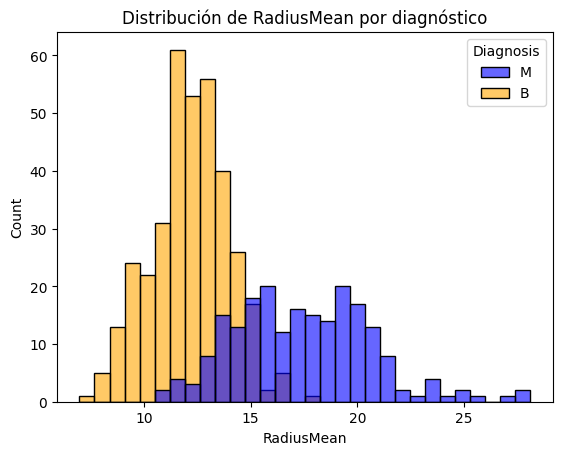

In [135]:
sns.histplot(data=df_PascalCase_plus, x="RadiusMean", hue="Diagnosis",   #-hue es la propia herramienta en cuanto condiciona el histograma segun los valores unicos de
             bins=30, palette={"B": "orange", "M": "blue"}, alpha=0.6)   #  la columna que le ponemos-asignamos.... si no pusiesemos hacer eso, nos hubiera tocado
                                                                         #  hacer algo como
                                                                         #  df_PascalCase_plus[df_PascalCase_plus.Diagnosis=="M o B"].RadiusMean-
plt.title("Distribución de RadiusMean por diagnóstico")
plt.show()

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

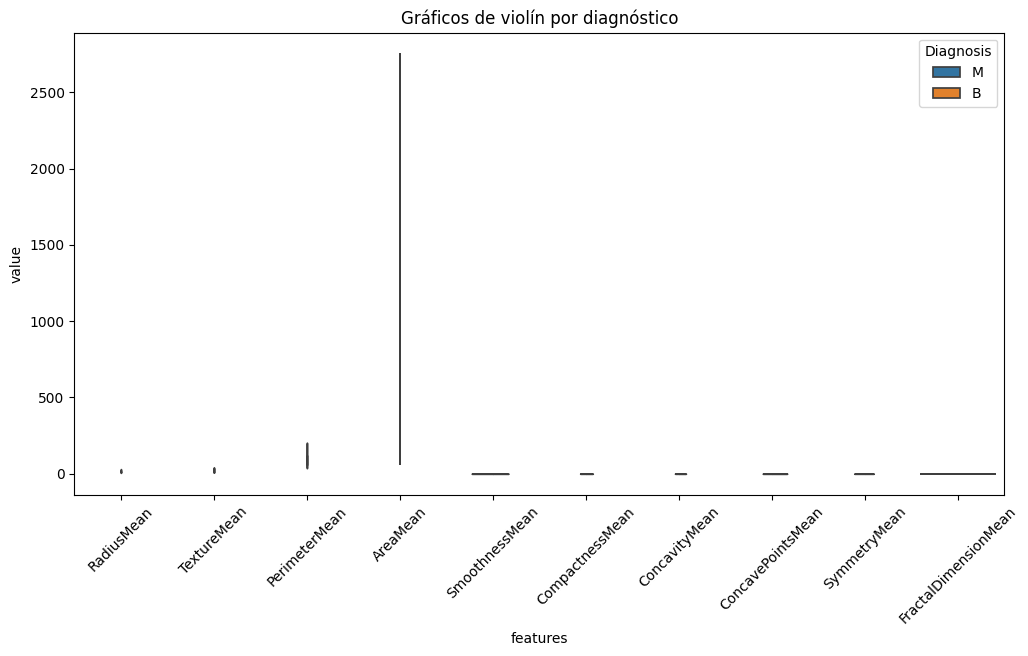

In [139]:
features = ["RadiusMean","TextureMean","PerimeterMean","AreaMean","SmoothnessMean",
            "CompactnessMean","ConcavityMean","ConcavePointsMean","SymmetryMean","FractalDimensionMean"]

data = pd.melt(df_PascalCase_plus[["Diagnosis"] + features],
               id_vars="Diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(12,6))
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
plt.title("Gráficos de violín por diagnóstico")
plt.show()


no se ve nada xD........ jmmmmmmm aaaaahhhh bueno, ¡eureka!. Pille que posiblemente el probema sea por AreaMean porque es muy grande y pues recuerde que arriba escalamos todos a normalizar (pusimos en "unidades" standard), asi la diferencia de dimensiones al graficar no nos matarian, considere pues entonces:

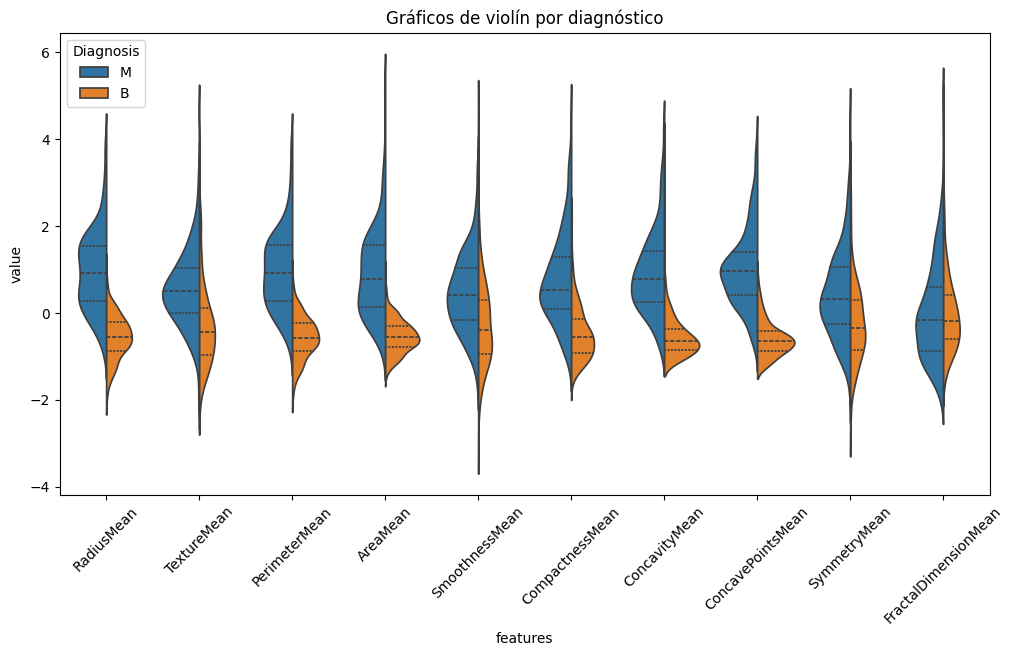

In [140]:
features = ["RadiusMean","TextureMean","PerimeterMean","AreaMean","SmoothnessMean",
            "CompactnessMean","ConcavityMean","ConcavePointsMean","SymmetryMean","FractalDimensionMean"]

data = pd.melt(df_PascalCase_plus_unid_std[["Diagnosis"] + features],
               id_vars="Diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(12,6))
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
plt.title("Gráficos de violín por diagnóstico")
plt.show()

bueno, excelente, claro, habia que normalizar para poder comparar caracteristicas de diferentes tipos, obviamente

12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```


Siguiendo la primera alternativa, podemos usar la version que no esta en "unidades" standard, de modo que:

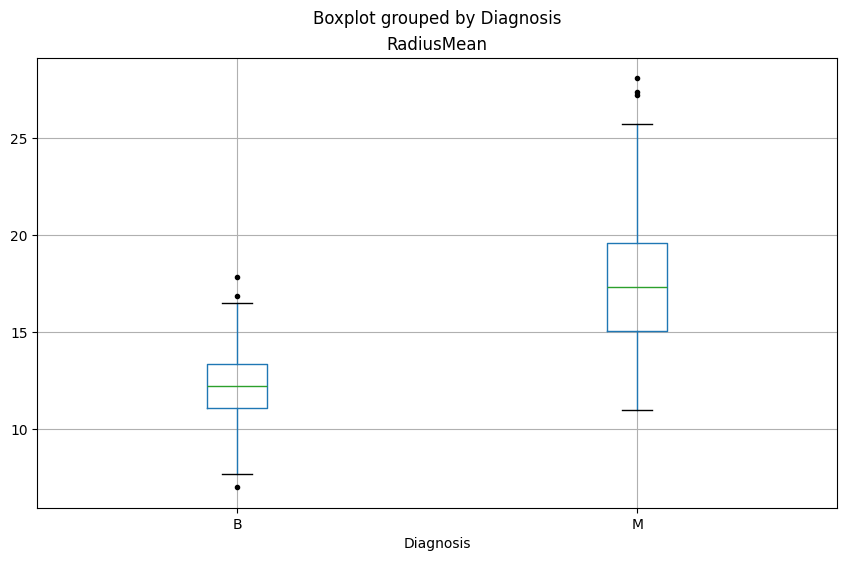

In [145]:
df_PascalCase_plus.boxplot(column="RadiusMean", by="Diagnosis", sym="k.", figsize=(10,6))  #-otra opcion aparte de usar pandas.DataFrame.boxplot() era usar:
                                                                                           #  sns.boxplot(data=df_limpio, x="species", y="flipper_length_mm", hue="sex")-
#sns.boxplot(data=df_PascalCase_plus, x="Diagnosis", y="RadiusMean")#, hue="sex")
plt.show()

In [162]:
df_PascalCase_plus.groupby("Diagnosis").describe()#['RadiusMean'].quantile(0.25)

Id                                                          \
           count          mean           std     min       25%       50%   
Diagnosis                                                                  
B          357.0  2.654382e+07  1.167397e+08  8913.0  874662.0  908916.0   
M          212.0  3.681805e+07  1.378965e+08  8670.0  861345.0  895366.5   

                                   RadiusMean             ...  \
                  75%          max      count       mean  ...   
Diagnosis                                                 ...   
B          8812816.00  911320502.0      357.0  12.146524  ...   
M          8911289.75  911296202.0      212.0  17.462830  ...   

          FractalDimensionWorst         DiagnosisNumeric                      \
                            75%     max            count mean  std  min  25%   
Diagnosis                                                                      
B                      0.085410  0.1486            357.0  0.0  0.0  0.0  0.0   
M                      0.102625  0.2075            212.0  1.0  0.0  1.0  1.0   

                          
           50%  75%  max  
Diagnosis                 
B          0.0  0.0  0.0  
M          1.0  1.0  1.0  

[2 rows x 256 columns]

In [172]:
df_PascalCase_plus_no_outliers = pd.DataFrame()

#-Recorremos cada grupo (B y M), porque de lo contrario, corremos el riesgo de no quitarlos bien, en el sentido de que lo hariamos sobre RadiusMean en general y
#  por tanto sobre estimar.... por ejm pille que los de B que estan por encima, podrian no quitarsen pues caen en el "estomago" de M-
for diag, grupo in df_PascalCase_plus.groupby("Diagnosis"):
    Q1 = grupo['RadiusMean'].quantile(0.25)
    Q3 = grupo['RadiusMean'].quantile(0.75)
    IQR = Q3 - Q1

    #-Filtramos valores dentro del rango permitido-
    grupo_filtrado = grupo[~((grupo['RadiusMean'] < (Q1 - 1.5 * IQR)) |
                             (grupo['RadiusMean'] > (Q3 + 1.5 * IQR)))]

    #-Concatenamos de nuevo al DataFrame limpio-
    df_PascalCase_plus_no_outliers = pd.concat([df_PascalCase_plus_no_outliers, grupo_filtrado], axis=0)
df_PascalCase_plus_no_outliers

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,1
564,926424,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,1
565,926682,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,1
566,926954,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,1


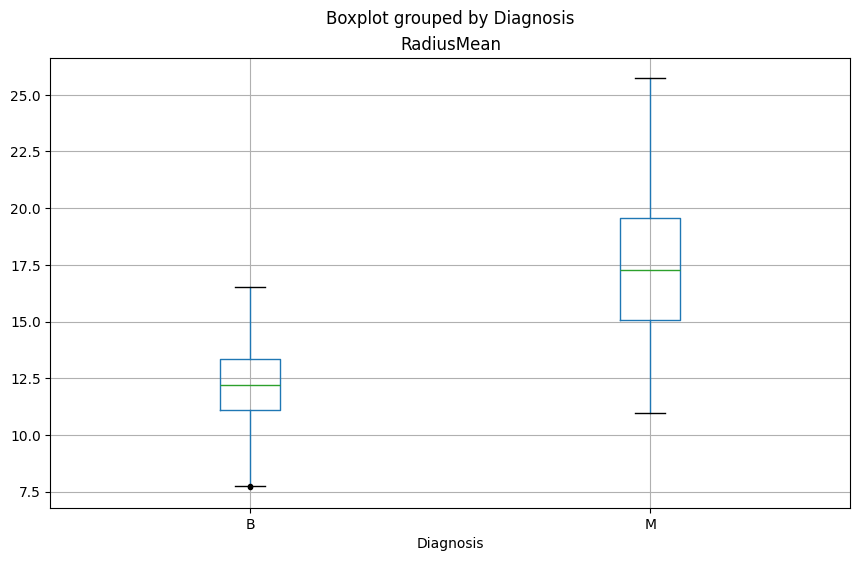

In [173]:
df_PascalCase_plus_no_outliers.boxplot(column="RadiusMean", by="Diagnosis", sym="k.", figsize=(10,6))  #-otra opcion aparte de usar pandas.DataFrame.boxplot() era usar:
                                                                                           #  sns.boxplot(data=df_limpio, x="species", y="flipper_length_mm", hue="sex")-
#sns.boxplot(data=df_PascalCase_plus_no_outliers, x="Diagnosis", y="RadiusMean")#, hue="sex")
plt.show()

Del grafico anterior, vemos como la eliminacion de los datos hizo que se nos pusiera un poquito mas exigente, e incluso marca como outlayer a ese puntico que antes no era......


Bueno..... la verdad me dio curiosidad la otra alternativa de

"Otra alternativa es utilizar el puntaje Z para detectar outliers:

df = df[(np.abs(stats.zscore(df['edad'])) < 3)]"

Y bueno, de lo que vi es porque el Z-score mide cuántas desviaciones estándar está un valor respecto a la media:

$$
z = \frac{x - \mu}{\sigma}
$$

- Si $|z| > 3$ (convención común), se considera un outlier.
- La lógica: casi todos los datos "normales" caen dentro de $\pm 3\sigma$.

lo cual pues tiene mucho sentido desde una distribucion gaussina, aun asi, cabe acotar que IQR es más robusto pues no depende de que la distribución sea normal a diferencia de Z-score que asume más o menos que la variable es gaussiana, y que puede ser sensible si hay colas pesadas i,e a distribuciones mas sesgadas.

Ejemplo:

Supongamos que tenemos este vector de datos:  

$$
X = [10, 12, 11, 13, 12, 500]
$$

Claramente el $500$ se ve rarísimo (es un outlier).

* Método IQR

  1. Ordenamos:  
     $$
     [10, 11, 12, 12, 13, 500]
     $$  

  2. Calculamos los cuartiles
     $$
     Q1 = 11, \quad Q3 = 12.5, \quad IQR = Q3 - Q1 = 12.5 - 11 = 1.5
     $$  

  3. Rango permitido:
     $$
     [Q1 - 1.5 \cdot IQR, \; Q3 + 1.5 \cdot IQR] = [11 - 2.25, \; 12.5 + 2.25] = [8.75, \; 14.75]
     $$  

  4. Cualquier valor fuera de $[8.75, 14.75]$ es un outlier. Luego, $500$ es un outlier.  


* Método Z-score

  1. Media:  
     $$
     \mu = \frac{10 + 12 + 11 + 13 + 12 + 500}{6} \approx 93
     $$  

  2. Desviación estándar (aprox.):  
     $$
     \sigma \approx 199
     $$  

  3. Z-score de $500$:  
     $$
     z = \frac{500 - 93}{199} \approx 2.05
     $$  

  Como $|z| = 2.05 < 3$, el método de Z-score NO detecta a 500 como outlier.

Conclusión

- El método IQR sí detecta al 500 como valor atípico.  
- El método Z-score no lo detecta, porque el mismo 500 infla la media y la desviación estándar, quedando "camuflado".

Aun asi, hagamos la implementacion, ya que los violines señalan que capaz y no queda tan mal:


In [175]:
from scipy import stats
import numpy as np

df_PascalCase_plus_no_outliers_z = pd.DataFrame()

for diag, grupo in df_PascalCase_plus.groupby("Diagnosis"):
    #-Calcular z-scores dentro de cada grupo-
    z_scores = np.abs(stats.zscore(grupo['RadiusMean']))

    #-Filtrar valores con |z| < 3-
    grupo_filtrado = grupo[z_scores < 3]

    #-Concatenar de nuevo-
    df_PascalCase_plus_no_outliers_z = pd.concat([df_PascalCase_plus_no_outliers_z, grupo_filtrado], axis=0)

In [179]:
df_PascalCase_plus_no_outliers_z

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,1
564,926424,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,1
565,926682,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,1
566,926954,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,1


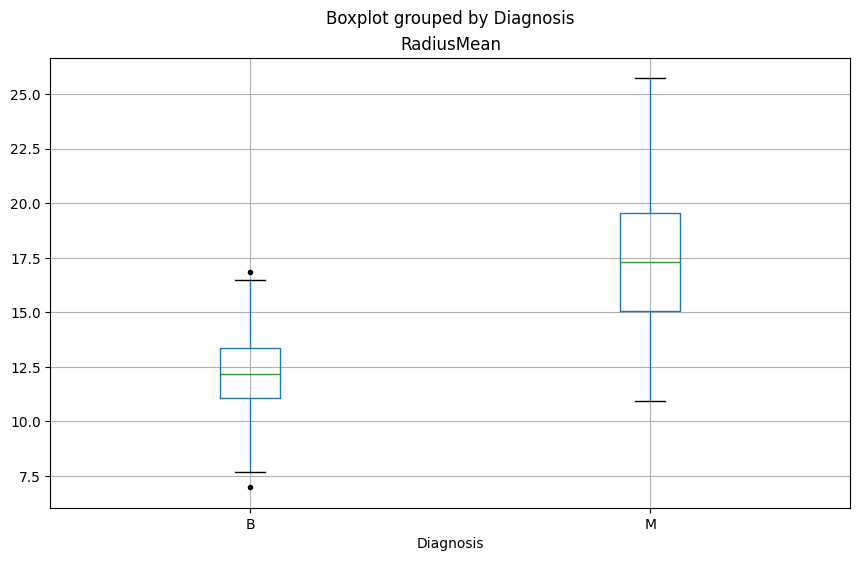

In [176]:
df_PascalCase_plus_no_outliers_z.boxplot(column="RadiusMean", by="Diagnosis", sym="k.", figsize=(10,6))  #-otra opcion aparte de usar pandas.DataFrame.boxplot() era usar:
                                                                                           #  sns.boxplot(data=df_limpio, x="species", y="flipper_length_mm", hue="sex")-
#sns.boxplot(data=df_PascalCase_plus_no_outliers_z, x="Diagnosis", y="RadiusMean")#, hue="sex")
plt.show()

13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

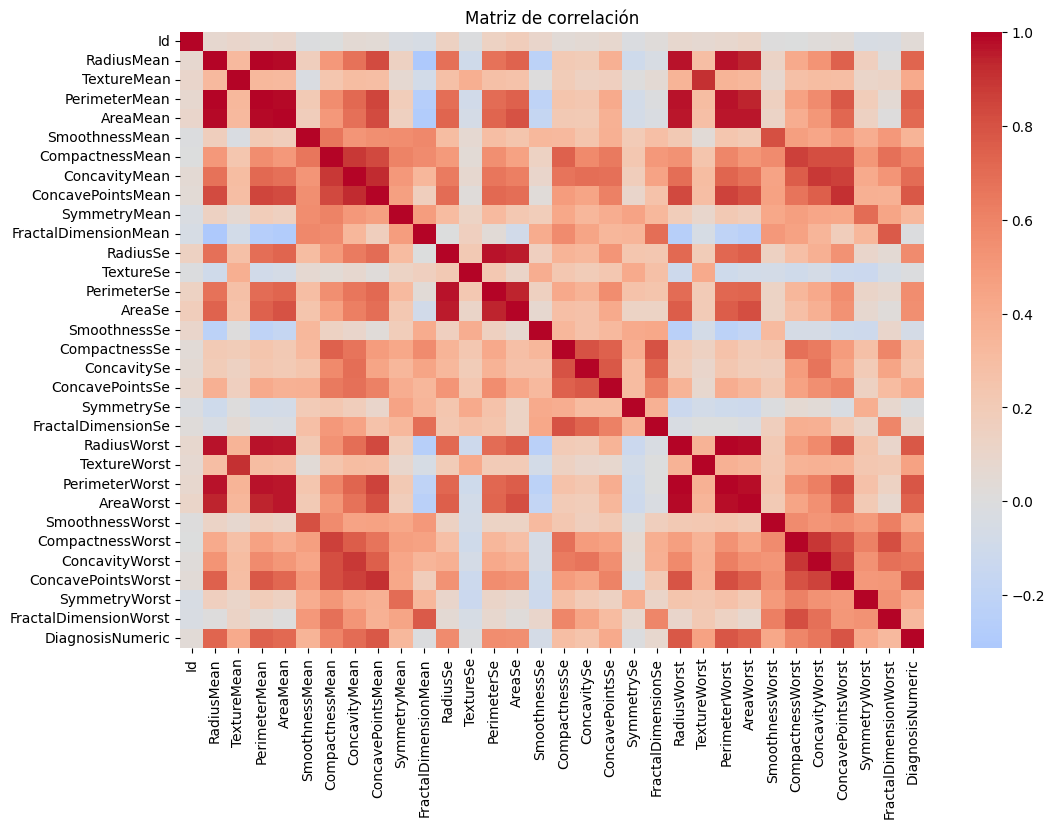

In [182]:
plt.figure(figsize=(12,8))
corr = df_PascalCase_plus_unid_std.drop(columns=["Diagnosis"]).corr()  #-uso la que esta en "unidades" estandar por obvias razones, relacionadas con el test de hip's-
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()


In [183]:
df_PascalCase_plus_unid_std.columns

Index(['Id', 'RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean',
       'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
       'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean', 'RadiusSe',
       'TextureSe', 'PerimeterSe', 'AreaSe', 'SmoothnessSe', 'CompactnessSe',
       'ConcavitySe', 'ConcavePointsSe', 'SymmetrySe', 'FractalDimensionSe',
       'RadiusWorst', 'TextureWorst', 'PerimeterWorst', 'AreaWorst',
       'SmoothnessWorst', 'CompactnessWorst', 'ConcavityWorst',
       'ConcavePointsWorst', 'SymmetryWorst', 'FractalDimensionWorst',
       'DiagnosisNumeric', 'Diagnosis'],
      dtype='object')

Observamos como RadiusMean, PerimeterMean y ConcavePointsMean son los que mas fuertemente correlacionados estan con el diagnostico (i,e parametros de tamaño y de forma-irregularidad)

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

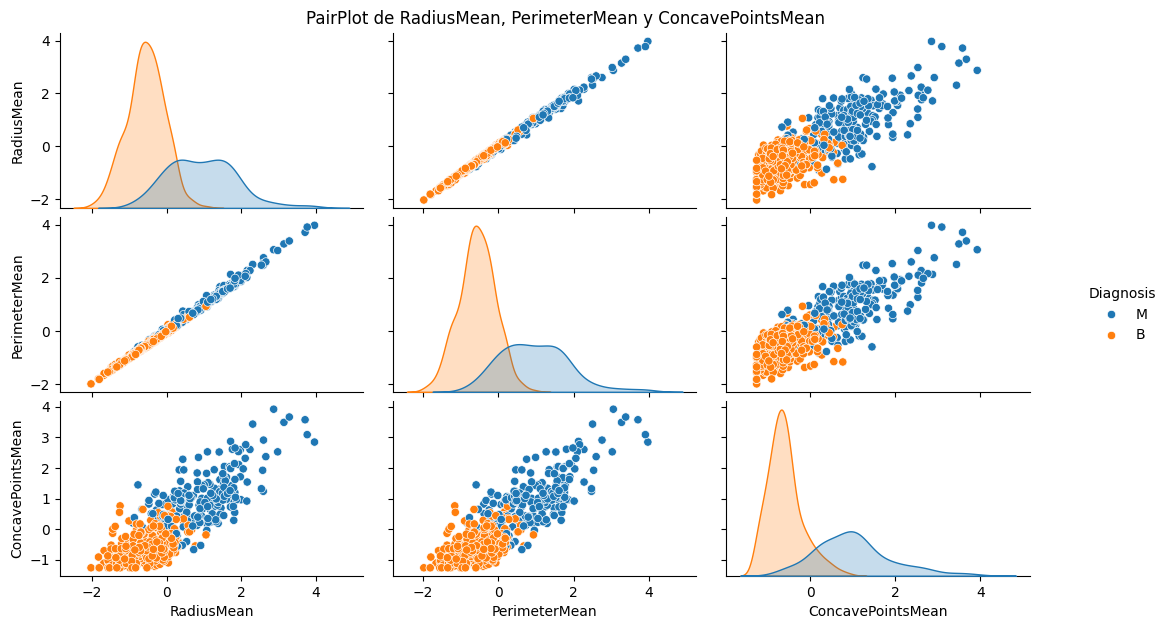

In [196]:
g = sns.pairplot(df_PascalCase_plus_unid_std, vars=["RadiusMean","PerimeterMean","ConcavePointsMean"], hue="Diagnosis")

g.fig.set_size_inches(12, 6)
g.fig.suptitle("PairPlot de RadiusMean, PerimeterMean y ConcavePointsMean", y=1.02)
plt.show()

Conclusiones PairPlot con datos en "unidades" standard
- Escala pareja: como ya están en z-score (media 0 y std 1), ahora sí todo se puede comparar directo. Y se nota clarito que los M (malignos) jalan más hacia valores positivos, mientras que los B (benignos) se quedan más hacia el lado negativo.
- Grupos separados: en las distribuciones de la diagonal, los dos grupos no están mezclados del todo, sino que cada uno se mueve en su propio rango. O sea, las variables sí ayudan a distinguir bien entre B y M.
- Redundancia obvia: el RadiusMean y el PerimeterMean están casi que calcados, la nube es una línea recta prácticamente. Eso quiere decir que en un modelo uno de los dos podria sobrar, porque dan la misma info.
- El valor de ConcavePointsMean: esta variable no separa tanto tanto, pero sí mete un poquito más de info que las otras, entonces puede servir de apoyo.

En resumidas cuentas, estas tres variables son buenas para separar tumores benignos de malignos (clasificar un tumor como uno u otro a punta de ver estas caracteristicas en el), pero dos de ellas (RadiusMean y PerimeterMean) podrian a llegar ser practicamente lo mismo..... Ahora bien, en cuanto al coeficiente de correlacion de Pearson y una posible prueba de hipotesis, note que si por ejm calculamos la correlación entre RadiusMean y PerimeterMean van a dar algo muy cercano a 1, o sea, casi perfecta. Por lo que el test t-Student para ver si la correlación es distinta de 0 sobra acá, porque con tantos datos y una correlación tan alta, es obvio que da significativa. Por ello, se considero no necesario ahondar en algo asi para ninguna de estas.